# Insurance Claim Fraud Detection

# Importing Libraries

# Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

Tn this we will be working with some auto insurance data to demonstrate how we can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Independent Variables

1.	months_as_customer: Number of months of patronage
    
2.	age: the length of time a customer has lived or a thing has existed
    
3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
    
4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
    
5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
    
6.	policy_csl: is basically Combined Single Limit
    
7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
    
8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
    
9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
    
10.	insured_zip: It is the zip code where the insurance was made
    
11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
    
12.	insured_education_level: This refers to the Level of education of the customer
    
13.	insured_occupation: This refers Occupation of the customer
    
14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
    
15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
        
16.capital-gains: This refers to profit accrued due to insurance premium
    
17.	capital-loss: This refers to the losses incurred due to insurance claims
    
18.	incident_date: This refers to the date which claims where made by customers
    
19.	incident_type: This refers to the type of claim/vehicle damage made by customer
    
20.	collision_type: This refers to the area of damage on the vehicle
    
21.	incident_severity: This refers to the extent/level of damage
    
22.	authorities_contacted: This refers to the government agencies that were contacted after damage
    
23.	incident_state: This refers to the state at which the accident happened
    
24.	incident_city: This refers to the city at which the accident happened
    
25.	1ncident_location: This refers to the location at which the accident happened
    
26.	incident_hour_of_the_day: The period of the day which accident took place
    
27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
    
28.	property_damage: This refers to whether property was damaged or not
    
29.	bodily_injuries: This refers to injuries sustained
    
30.	witnesses: This refers to the number of witnesses involved
    
31.	police_report_available: This refers to whether the report on damage was documented or not
    
32.	total_claim_amount: This refers to the financial implications involved in claims
    
33.	injury_claim: This refers to physical injuries sustained
    
34.	property_claim: This refers to property damages during incident
    
35.	vehicle_claim: This refers to property damages during incident
    
36.	auto_make: This refers to the make of the vehicle
    
37.	auto_model: This refers to the model of the vehicle
    
38.	auto_year: This refers to the year which the vehicle was manufactured
    
39.	_c39:
    
40.	fraud_reported



Dataset Link-  
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Loading Dataset

In [2]:
df = pd.read_csv('Insurance_Claim_Fraud_Detection.csv')


In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
df.shape

(1000, 40)

In [7]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [8]:
# Checking for the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
# Specify columns with "?" to replace with NaN
columns_to_replace = ['collision_type', 'property_damage', 'police_report_available']

# Replace "?" with NaN in the specified columns
df[columns_to_replace] = df[columns_to_replace].replace({'?': np.nan})

In [10]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Outcome

In [11]:
 # Checking for the missing values in the dataset:

df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are missing values in the columns 'collision_type', 'property_damage', and 'police_report_available'.



Column '_c39 ' is empty. So, we're dropping this column as it is not contributing to the dataset.

# Handling the missing values:

In [12]:
# Dropping the '_c39' column as it does not contain any value.

df = df.drop(['_c39'], axis =1)



In [13]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


We'll replace the missing values with the mode of the column- 'collision_type','police_report_available','property_damage'

1.'collision_type'

In [14]:
# Checking for the value counts of the column 'collision_type'.

df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

Rear collission more .So we replace missing value with Rear Collission

In [15]:
# Replacing the missing values with 'Rear Collision'

df['collision_type'] = df['collision_type'].fillna('Rear Collision')

2.'property_damage'

In [16]:
# Checking for the value counts

df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

most occuring value is NO,we'll replace the missing values with NO

In [17]:
# Replacing the missing values 

df['property_damage'] = df['property_damage'].fillna('NO')

3.police_report_available'

In [18]:
# Looking for the value counts

df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

most occuring value is NO,we'll replace the missing values with NO

In [19]:
# Replacing the missing value of the column 'police_report_available'

df['police_report_available'] = df['police_report_available'].fillna('NO')

In [20]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [21]:
# Checking for the missing value again after handling the missing values.

df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# Splitting the policy bind date into day, month, and year

1.policy_bind_date

In [22]:
df[["day", "Month", "Year"]] = df['policy_bind_date'].str.split("-", expand=True)


2.incident_date

In [23]:
# Splitting the incident_date column into day, month, and year

df[["incident_day", "incident_month", "incident_year"]] = df['incident_date'].str.split("-", expand = True)


In [24]:
# Dropping the policy_bind_date column as we have already splitted it into day, month ,and year

df = df.drop(['policy_bind_date', 'incident_date'], axis=1)

In [25]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,day,Month,Year,incident_day,incident_month,incident_year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,Saab,92x,2004,Y,17,10,2014,25,01,2015
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,Mercedes,E400,2007,Y,27,06,2006,21,01,2015
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,Dodge,RAM,2007,N,06,09,2000,22,02,2015
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Chevrolet,Tahoe,2014,Y,25,05,1990,10,01,2015
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,Accura,RSX,2009,N,06,06,2014,17,02,2015


In [26]:
# Checking for the datatype of the columns:
df.dtypes       

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

In [27]:
# Checking for the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

Integer (int64): 17 columns (e.g., months_as_customer, age, policy_number, etc.)
    
Float (float64): 1 column (policy_annual_premium)
    
Object (string/categorical): 25 columns (e.g., policy_state, policy_csl, insured_sex, etc.)

# Data Visualization:

In [28]:
# Checking the value counts of the target column
fraud_reported_counts = df['fraud_reported'].value_counts()

# Display the counts
print(fraud_reported_counts)


N    753
Y    247
Name: fraud_reported, dtype: int64


In [29]:
# Manually calculate the percentage of fraud reported claims
fraud_percentage_manual = (247 / 1000) * 100

# Display the result
print(f"Manually calculated percentage of fraud reported claims: {fraud_percentage_manual:.2f}%")


Manually calculated percentage of fraud reported claims: 24.70%


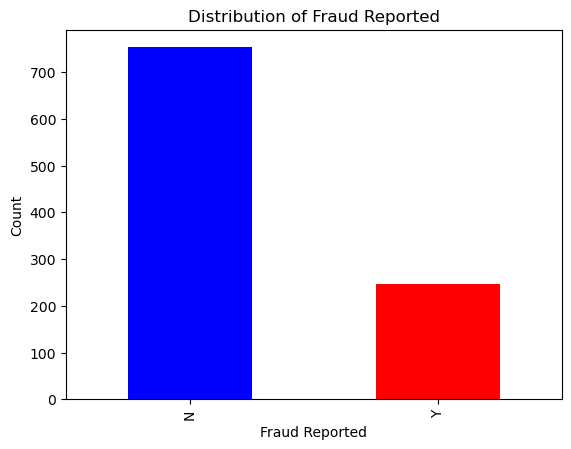

In [30]:
# Plotting the distribution of 'fraud_reported'
df['fraud_reported'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.show()

It shows that target value is not balanced .we will balanced later.

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


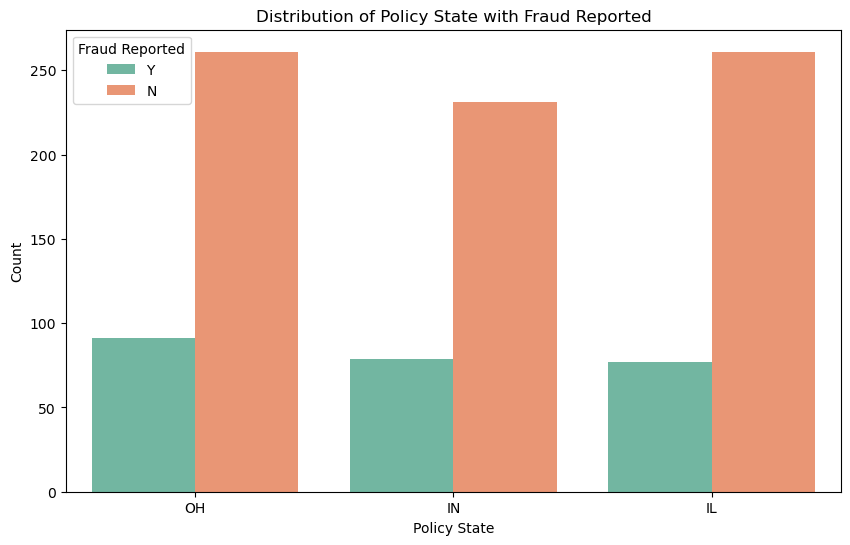

In [31]:
# Checking the value counts of the 'policy_state' column
policy_state_counts = df['policy_state'].value_counts()
print(policy_state_counts)
# Display the counts
# Plotting the distribution of 'policy_state' with 'fraud_reported' as hue
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='policy_state', hue='fraud_reported', palette='Set2')

plt.title('Distribution of Policy State with Fraud Reported')
plt.xlabel('Policy State')
plt.ylabel('Count')
plt.legend(title='Fraud Reported', loc='upper left')
plt.show()

From the graph, we observed taht frauad calim are almost equal for policy state.

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


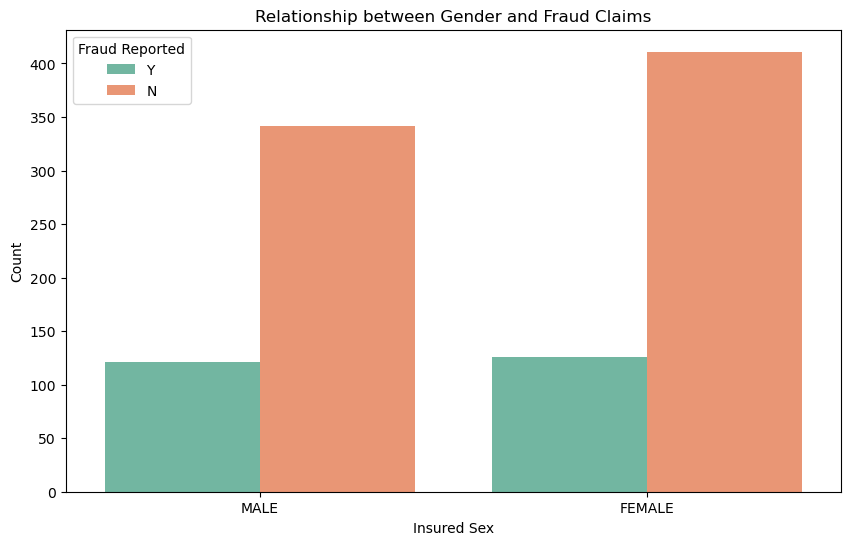

In [32]:
# Checking the value counts of the 'insured_sex' column
insured_sex_counts = df['insured_sex'].value_counts()

# Display the counts
print(insured_sex_counts)

# Plotting the relationship between gender and fraud claims
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='insured_sex', hue='fraud_reported', palette='Set2')

plt.title('Relationship between Gender and Fraud Claims')
plt.xlabel('Insured Sex')
plt.ylabel('Count')
plt.legend(title='Fraud Reported', loc='upper left')
plt.show()

This suggests that there are more records with 'FEMALE' as the insured sex compared to 'MALE' in your dataset but the number of fraud claims are almost equal for males and females,it shows  the ratio of fraud claims is more in the case of males as compared to the females. 

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


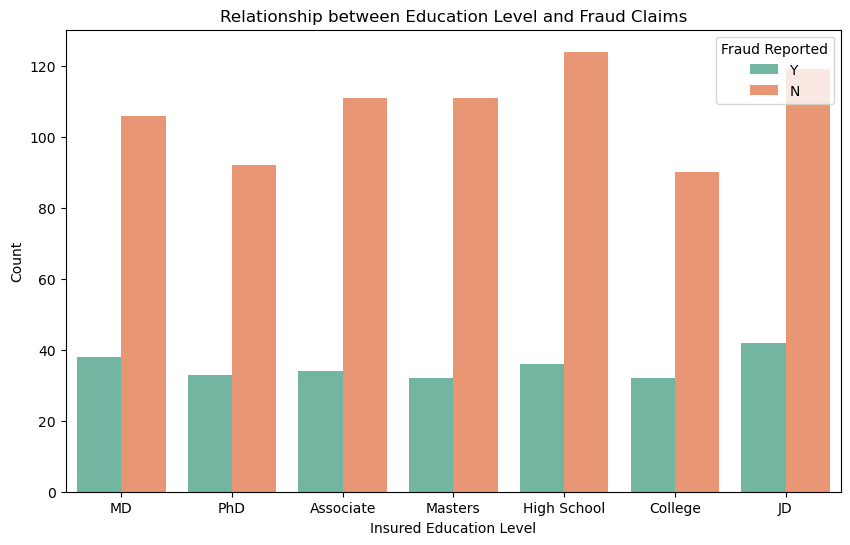

In [33]:
# Checking the value counts of the 'insured_education_level' column
education_level_counts = df['insured_education_level'].value_counts()

# Display the counts
print(education_level_counts)

# Plotting the relationship between education level and fraud claims
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='insured_education_level', hue='fraud_reported', palette='Set2')

plt.title('Relationship between Education Level and Fraud Claims')
plt.xlabel('Insured Education Level')
plt.ylabel('Count')
plt.legend(title='Fraud Reported', loc='upper right')
plt.show()

In [34]:
    # Checking the value counts of the 'insured_occupation' column
occupation_counts = df['insured_occupation'].value_counts()

# Display the counts
print(occupation_counts)


machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


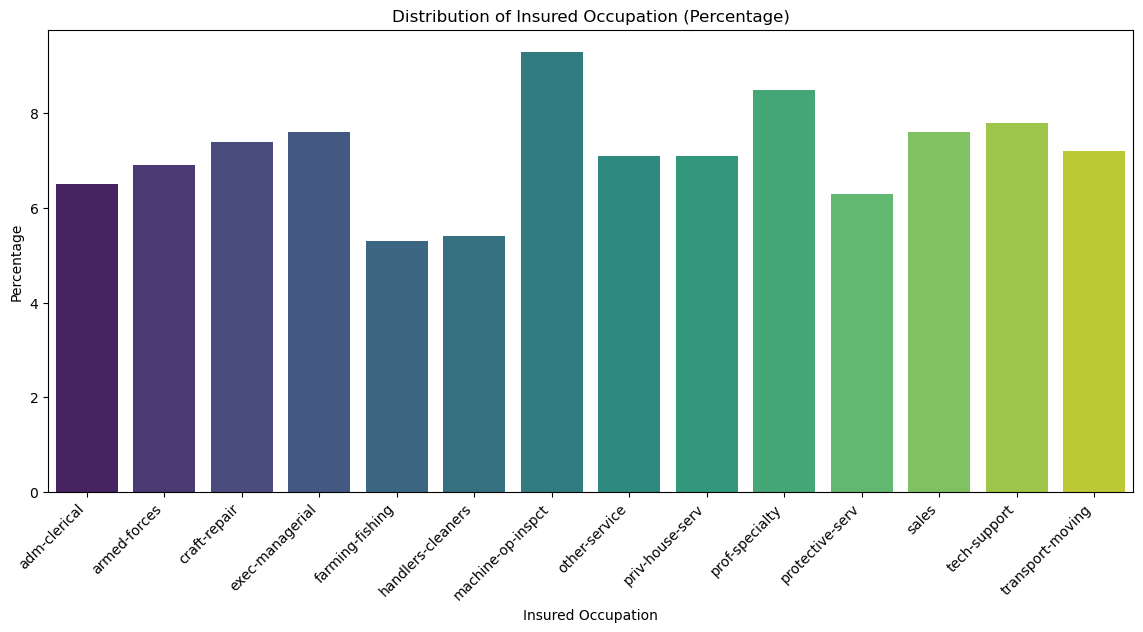

In [35]:
# Calculate the percentage of each occupation
occupation_percentage = (df['insured_occupation'].value_counts(normalize=True) * 100).sort_index()

# Plotting the distribution of 'insured_occupation' in percentage
plt.figure(figsize=(14, 6))
sns.barplot(x=occupation_percentage.index, y=occupation_percentage.values, palette='viridis')

plt.title('Distribution of Insured Occupation (Percentage)')
plt.xlabel('Insured Occupation')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  
plt.show()

<Figure size 1400x600 with 0 Axes>

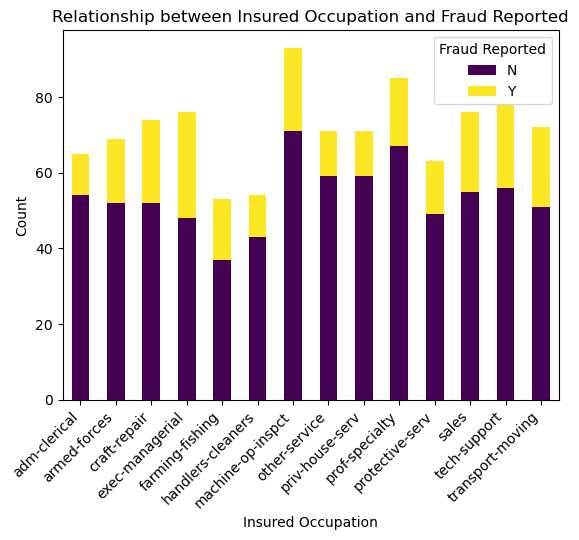

In [36]:
# Create a cross-tabulation (contingency table) between 'insured_occupation' and 'fraud_reported'
occupation_fraud_crosstab = pd.crosstab(df['insured_occupation'], df['fraud_reported'])

# Plotting the stacked bar plot
plt.figure(figsize=(14, 6))
occupation_fraud_crosstab.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Relationship between Insured Occupation and Fraud Reported')
plt.xlabel('Insured Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Fraud Reported', loc='upper right')
plt.show()

machine-op-inspct occupation -claimed minimum fraud claims.

exec-managerial occupation -claimed maximum fraud claims.

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


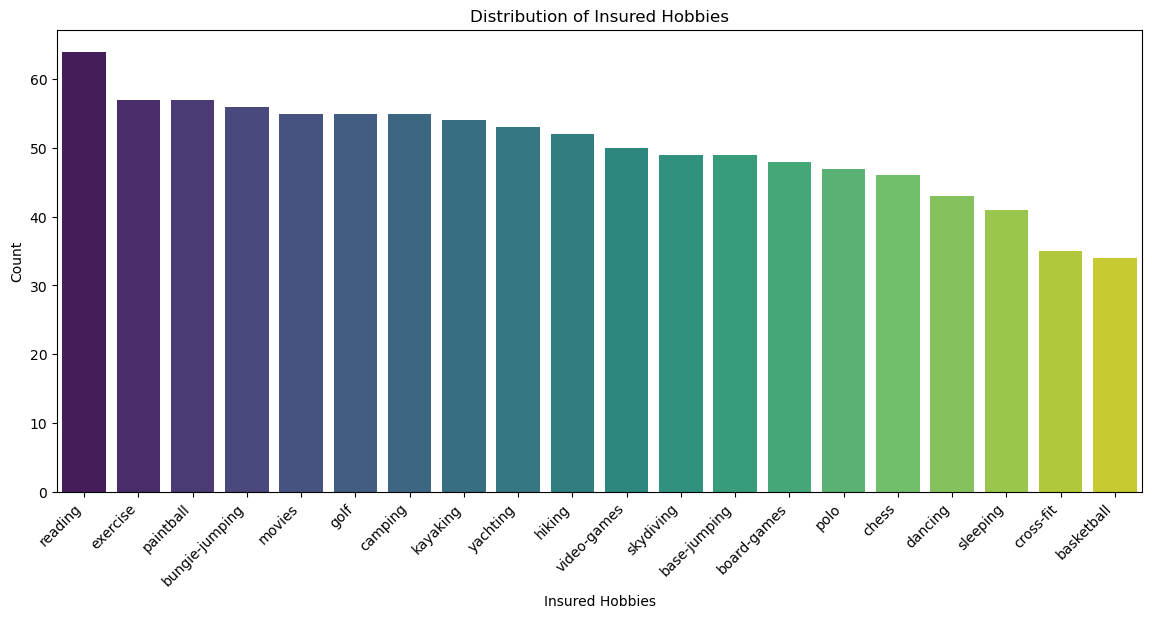

In [37]:
# Checking the value counts of the 'insured_hobbies' column
hobbies_counts = df['insured_hobbies'].value_counts()

# Display the counts
print(hobbies_counts)

# Plotting the distribution of 'insured_hobbies'
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='insured_hobbies', palette='viridis', order=df['insured_hobbies'].value_counts().index)

plt.title('Distribution of Insured Hobbies')
plt.xlabel('Insured Hobbies')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

<Figure size 1400x600 with 0 Axes>

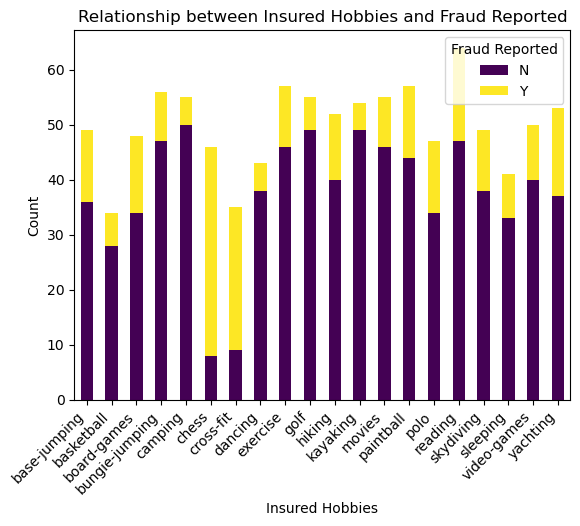

In [38]:
# Create a cross-tabulation (contingency table) between 'insured_hobbies' and 'fraud_reported'
hobbies_fraud_crosstab = pd.crosstab(df['insured_hobbies'], df['fraud_reported'])

# Plotting the stacked bar plot
plt.figure(figsize=(14, 6))
hobbies_fraud_crosstab.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Relationship between Insured Hobbies and Fraud Reported')
plt.xlabel('Insured Hobbies')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Fraud Reported', loc='upper right')
plt.show()

maximum claim for fraud detected in Chess

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


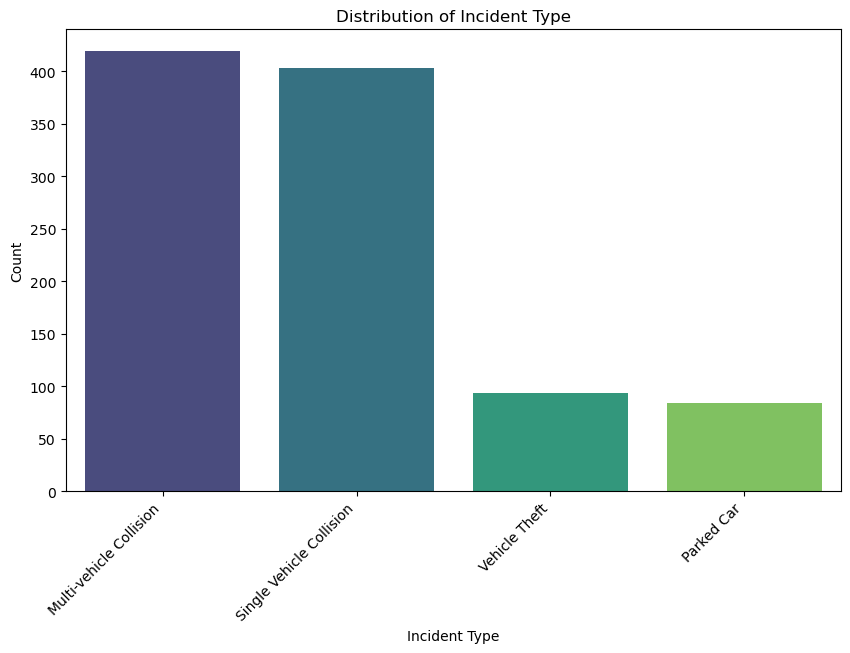

In [39]:
 #Checking the value counts of the 'incident_type' column
incident_type_counts = df['incident_type'].value_counts()

# Display the counts
print(incident_type_counts)

# Plotting the distribution of 'incident_type'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='incident_type', palette='viridis', order=df['incident_type'].value_counts().index)

plt.title('Distribution of Incident Type')
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

<Figure size 1200x600 with 0 Axes>

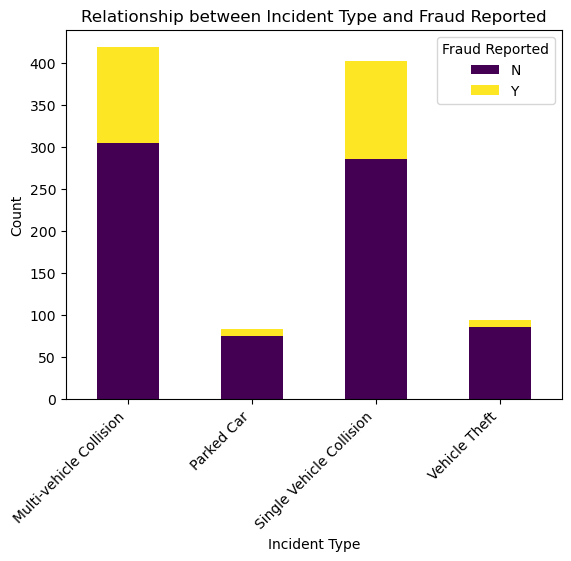

In [40]:
# Create a cross-tabulation (contingency table) between 'incident_type' and 'fraud_reported'
incident_type_fraud_crosstab = pd.crosstab(df['incident_type'], df['fraud_reported'])

# Plotting the stacked bar plot
plt.figure(figsize=(12, 6))
incident_type_fraud_crosstab.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Relationship between Incident Type and Fraud Reported')
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Fraud Reported', loc='upper right')
plt.show()

Fraud claims are minimum - parked car and vehicle theft.

Fraud claims are maximun- multi vehicle collision and single vehicle


Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


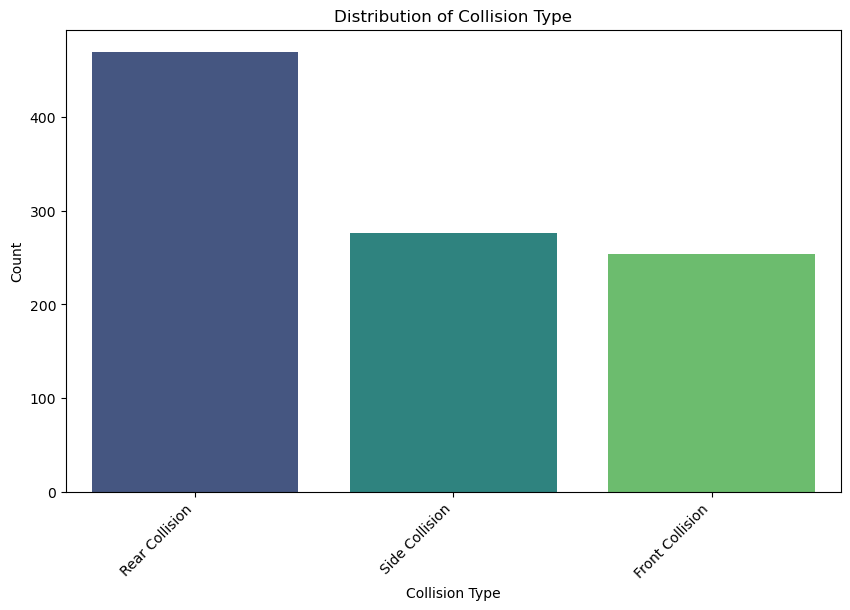

In [41]:
# Replacing '?' with NaN in the 'collision_type' column
df['collision_type'] = df['collision_type'].replace({'?': np.nan})

# Checking the value counts of the 'collision_type' column
collision_type_counts = df['collision_type'].value_counts()

# Display the counts
print(collision_type_counts)

# Plotting the distribution of 'collision_type'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='collision_type', palette='viridis', order=df['collision_type'].value_counts().index)

plt.title('Distribution of Collision Type')
plt.xlabel('Collision Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

<Figure size 1200x600 with 0 Axes>

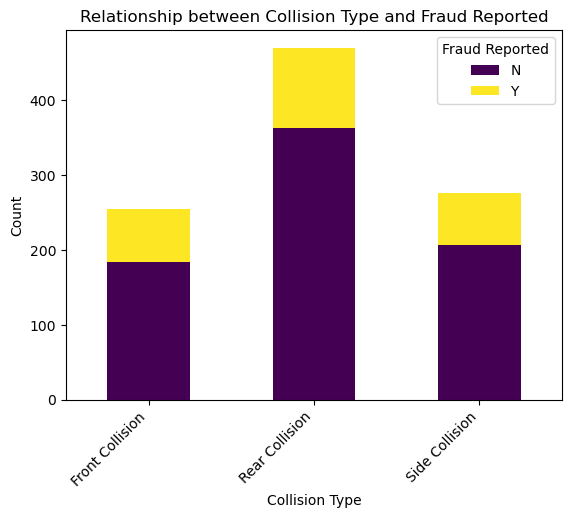

In [42]:
# Create a cross-tabulation (contingency table) between 'collision_type' and 'fraud_reported'
collision_type_fraud_crosstab = pd.crosstab(df['collision_type'], df['fraud_reported'])

# Plotting the stacked bar plot
plt.figure(figsize=(12, 6))
collision_type_fraud_crosstab.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Relationship between Collision Type and Fraud Reported')
plt.xlabel('Collision Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Fraud Reported', loc='upper right')
plt.show()

Maximum fraud claims -Rear Collision

Minimum Fraud Collission- side collision

In [43]:
# Checking the value counts of the 'incident_severity' column
severity_counts = df['incident_severity'].value_counts()
severity_counts

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

<Figure size 1000x600 with 0 Axes>

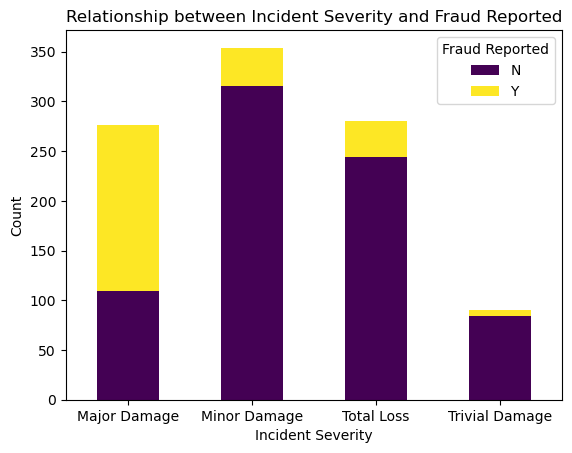

In [44]:
# Create a cross-tabulation (contingency table) between 'incident_severity' and 'fraud_reported'
severity_fraud_crosstab = pd.crosstab(df['incident_severity'], df['fraud_reported'])

# Plotting the stacked bar plot
plt.figure(figsize=(10, 6))
severity_fraud_crosstab.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Relationship between Incident Severity and Fraud Reported')
plt.xlabel('Incident Severity')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.legend(title='Fraud Reported', loc='upper right')
plt.show()

 minimum fraud claims - Trivial Damage
    
Maximum fraud - of major damage.

In [45]:
# Checking the value counts of the 'authorities_contacted' column
authorities_counts = df['authorities_contacted'].value_counts()

# Display the counts
print(authorities_counts)


Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


<Figure size 1000x600 with 0 Axes>

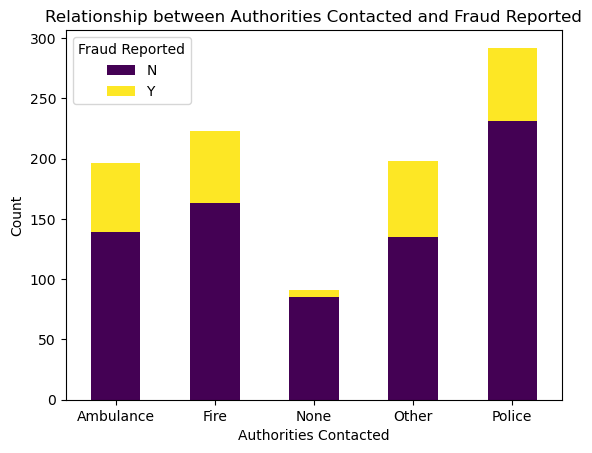

In [46]:
# Create a cross-tabulation (contingency table) between 'authorities_contacted' and 'fraud_reported'
authorities_fraud_crosstab = pd.crosstab(df['authorities_contacted'], df['fraud_reported'])

# Plotting the stacked bar plot
plt.figure(figsize=(10, 6))
authorities_fraud_crosstab.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Relationship between Authorities Contacted and Fraud Reported')
plt.xlabel('Authorities Contacted')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.legend(title='Fraud Reported', loc='upper left')
plt.show()

In [47]:
# Checking for the value counts of column 'incident_state
incident_state_counts = df['incident_state'].value_counts()

# Display the counts
print(incident_state_counts)

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


<Figure size 1200x600 with 0 Axes>

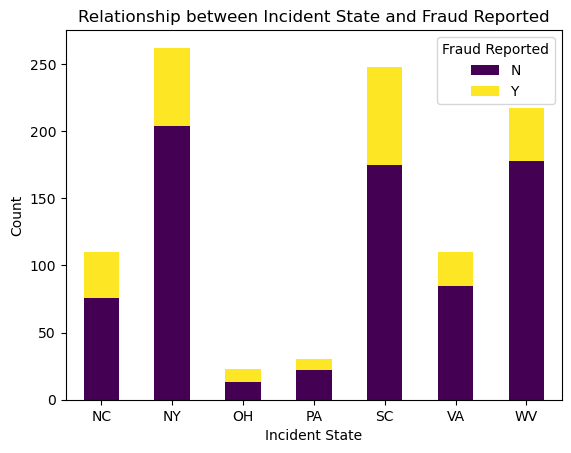

In [48]:
# # Create a cross-tabulation (contingency table) between 'incident_state' and 'fraud_reported'
state_fraud_crosstab = pd.crosstab(df['incident_state'], df['fraud_reported'])

# Plotting the stacked bar plot
plt.figure(figsize=(12, 6))
state_fraud_crosstab.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Relationship between Incident State and Fraud Reported')
plt.xlabel('Incident State')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.legend(title='Fraud Reported', loc='upper right')
plt.show()

Maximum fraud claims -South Carolina (SC) state.

minimum rate of fraud claims - Ohio (OH) state.

In [49]:
# Checking for the incident_city column

df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

<Figure size 1200x600 with 0 Axes>

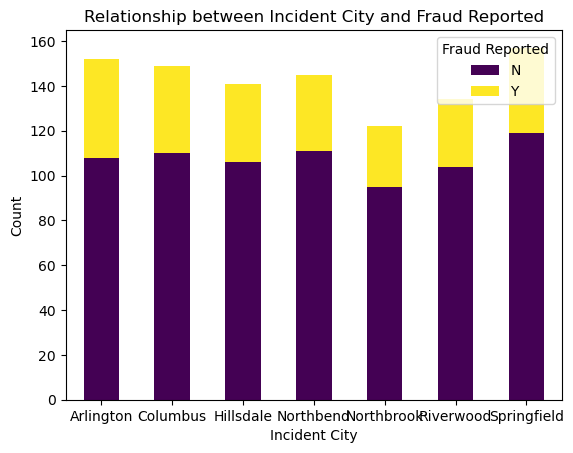

In [50]:
# Create a cross-tabulation (contingency table) between 'incident_city' and 'fraud_reported'
city_fraud_crosstab = pd.crosstab(df['incident_city'], df['fraud_reported'])

# Plotting the stacked bar plot
plt.figure(figsize=(12, 6))
city_fraud_crosstab.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Relationship between Incident City and Fraud Reported')
plt.xlabel('Incident City')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.legend(title='Fraud Reported', loc='upper right')
plt.show()

In [51]:
# Checking for the number of vehicles involved 

df['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

<Figure size 1200x600 with 0 Axes>

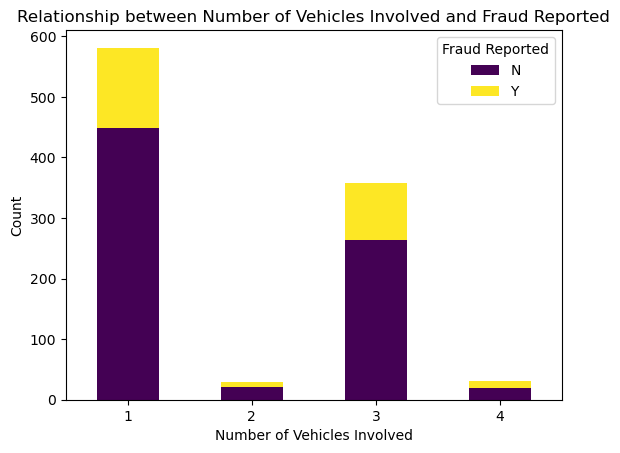

In [52]:
# Create a cross-tabulation (contingency table) between 'number_of_vehicles_involved' and 'fraud_reported'
vehicles_fraud_crosstab = pd.crosstab(df['number_of_vehicles_involved'], df['fraud_reported'])

# Plotting the stacked bar plot
plt.figure(figsize=(12, 6))
vehicles_fraud_crosstab.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Relationship between Number of Vehicles Involved and Fraud Reported')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.legend(title='Fraud Reported', loc='upper right')
plt.show()

# Label Encoding

In [53]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to label encode
categorical_columns = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation',
                        'insured_hobbies', 'insured_relationship', 'incident_type','incident_location', 'collision_type', 'incident_severity',
                        'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available',
                        'auto_make', 'auto_model', 'fraud_reported','day','Month','Year','incident_month','incident_day','incident_year']

# Label encode each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame with label-encoded categorical features
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,day,Month,Year,incident_day,incident_month,incident_year
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,10,1,2004,1,16,9,24,24,0,0
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,8,12,2007,1,26,5,16,20,0,0
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,4,30,2007,0,5,8,10,21,1,0
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,3,34,2014,1,24,4,0,9,0,0
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,0,31,2009,0,5,5,24,16,1,0


# Checking for the Statistic

In [54]:
df.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,day,Month,Year,incident_day,incident_month,incident_year
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,...,6.546000,19.318000,2005.103000,0.247000,14.448000,5.559000,11.604000,13.995000,0.496000,0.0
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,...,4.034869,11.136107,6.015861,0.431483,8.808001,3.499824,7.360391,8.670995,0.523697,0.0
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,0.000000,1995.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,3.000000,10.000000,2000.000000,0.000000,7.000000,2.000000,5.000000,6.750000,0.000000,0.0
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,...,7.000000,20.000000,2005.000000,0.000000,15.000000,6.000000,12.000000,14.000000,0.000000,0.0
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,...,10.000000,29.000000,2010.000000,0.000000,22.000000,9.000000,18.000000,21.000000,1.000000,0.0
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,...,13.000000,38.000000,2015.000000,1.000000,30.000000,11.000000,25.000000,30.000000,2.000000,0.0


# Checking for the Correlation

In [55]:
df.corr()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,day,Month,Year,incident_day,incident_month,incident_year
months_as_customer,1.000000,0.922098,0.057555,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,...,0.047655,0.004202,-0.000292,0.020544,0.054809,-0.001559,-0.048276,-0.001455,-0.042826,NaN
age,0.922098,1.000000,0.059413,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,...,0.030410,0.017343,0.001354,0.012143,0.056776,0.008357,-0.037444,0.003697,-0.037058,NaN
policy_number,0.057555,0.059413,1.000000,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,0.004564,...,0.023860,0.065240,-0.000183,-0.029443,0.045574,-0.003439,-0.040099,0.054788,-0.032472,NaN
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,...,0.017124,-0.025253,0.002114,0.029432,0.011178,0.046871,-0.007276,0.025572,0.018531,NaN
policy_csl,-0.026819,-0.015185,0.038917,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,...,-0.004701,0.047885,-0.033082,-0.037190,0.010164,-0.021547,-0.016466,-0.007640,-0.030164,NaN
policy_deductable,0.026807,0.029188,-0.006738,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,...,-0.035379,-0.003268,0.026105,0.014817,-0.000265,-0.025020,-0.049598,-0.022701,-0.026416,NaN
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,...,0.000045,-0.031849,-0.049226,-0.014480,-0.037933,-0.002480,0.001249,0.028797,-0.046097,NaN
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,...,-0.004443,0.040256,0.009893,0.058622,-0.023361,-0.045871,0.048008,-0.009974,-0.002576,NaN
insured_zip,0.017895,0.025604,0.007083,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,...,-0.020892,0.023637,-0.032736,0.019368,-0.044250,0.025924,-0.001100,0.027031,-0.032630,NaN
insured_sex,0.060925,0.073337,0.004564,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,...,0.026457,-0.018421,-0.028247,0.030873,0.039769,-0.001042,-0.032891,0.001924,-0.025471,NaN


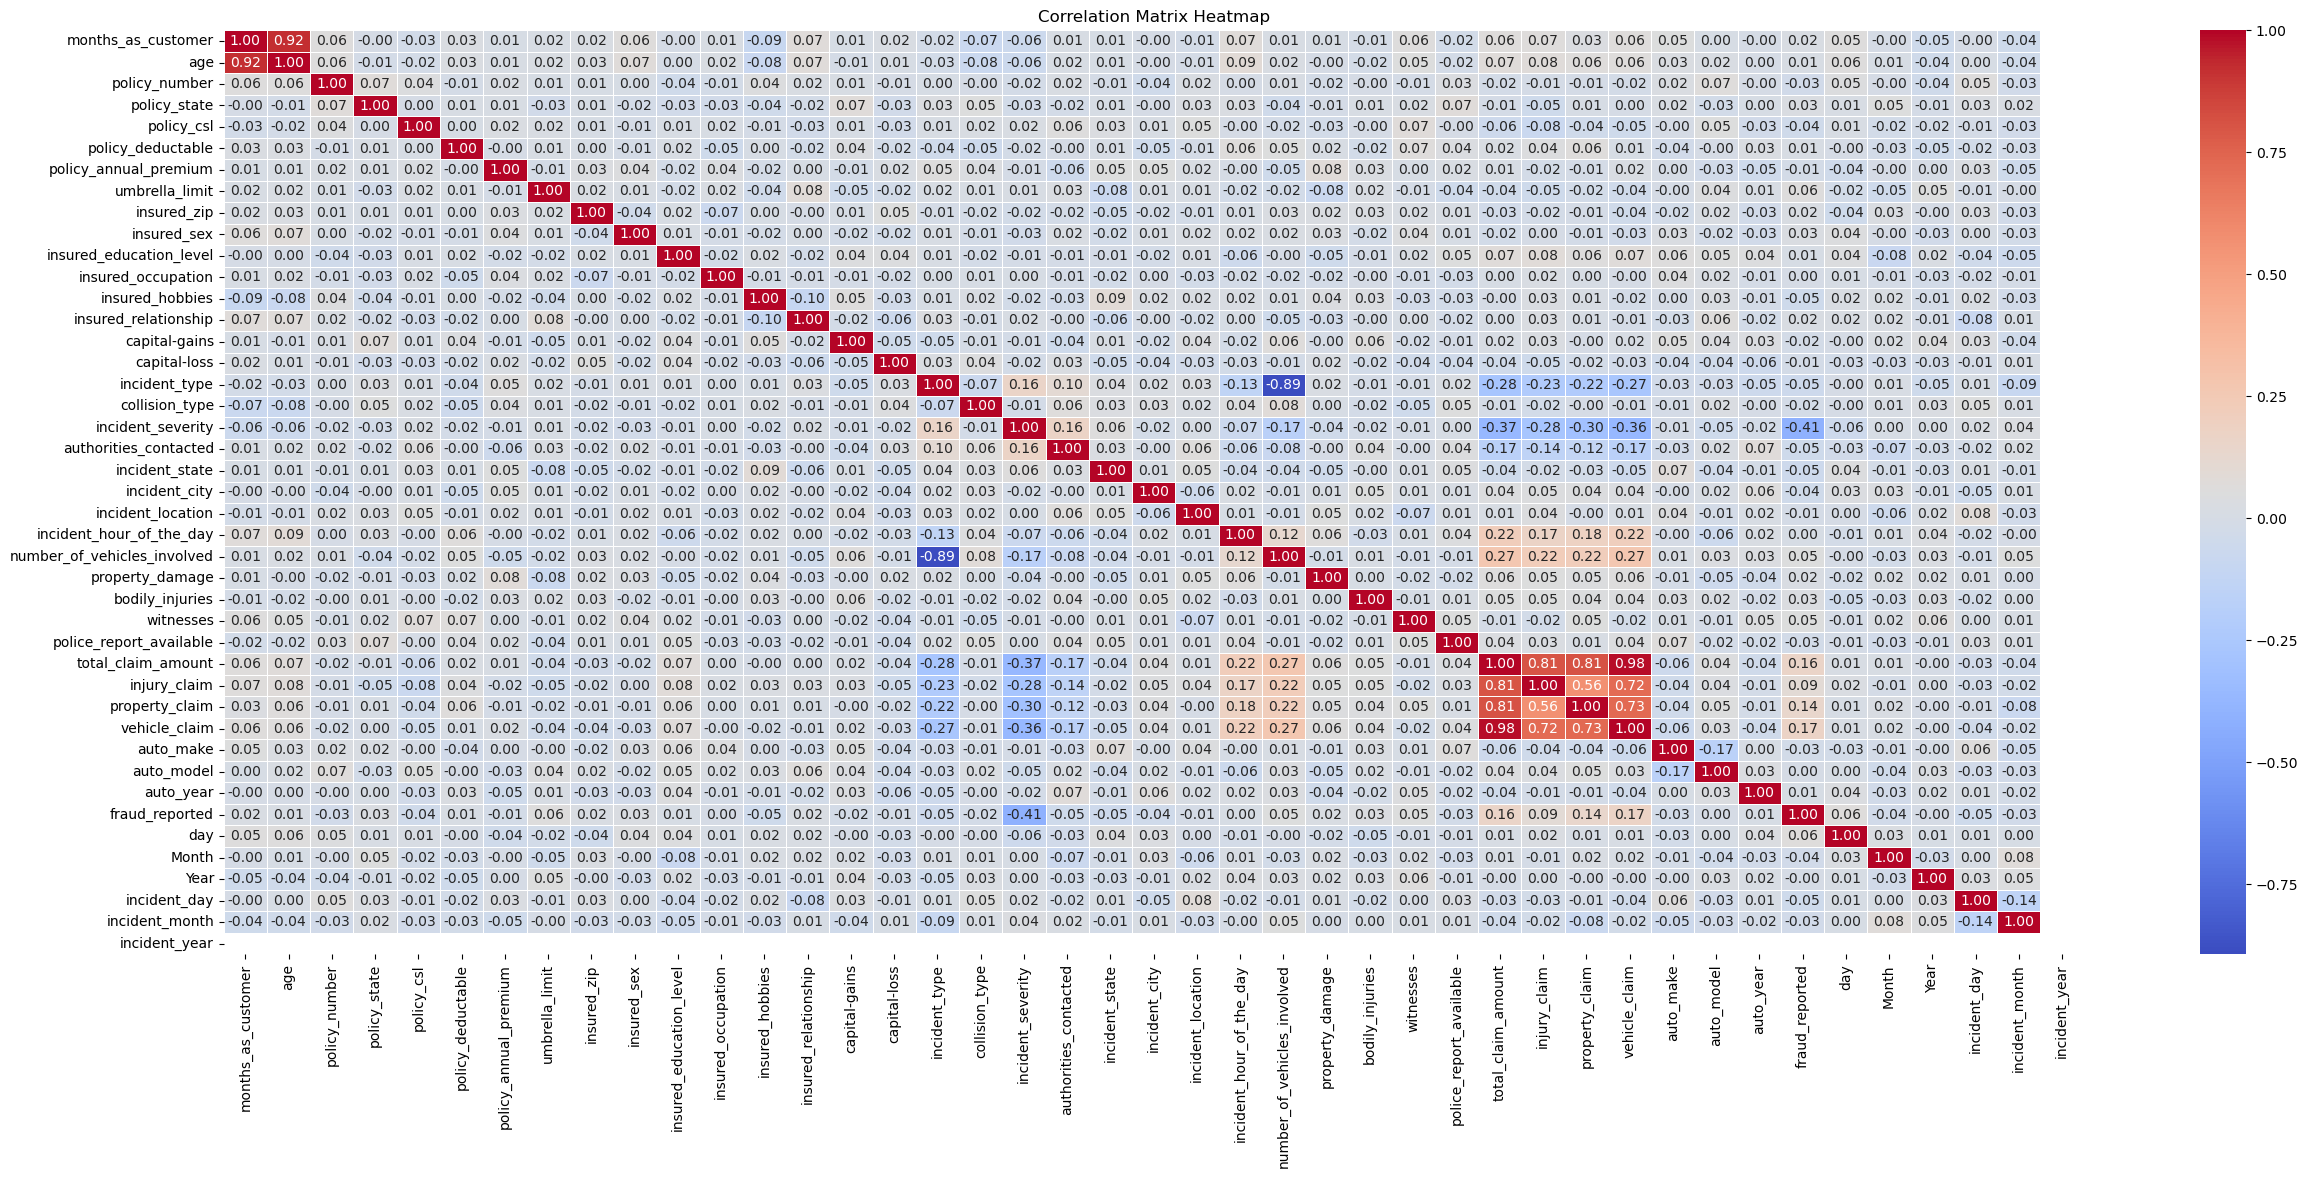

In [56]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(30, 12))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Matrix Heatmap")

# Show the plot
plt.show()

In [57]:
corr_matrix = df.corr()
fraud_correlation = corr_matrix['fraud_reported'].sort_values(ascending=False)
print(fraud_correlation)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
day                            0.063040
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
property_damage                0.017202
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
Year                          -0.000059
incident_location             -0.008832


maximum correlation with fraud reporeted - vehicle_claim column 

minimum correlation with fraud reporeted -incident_severity             

In [58]:
# Independent variables (features)
x= df.drop('fraud_reported', axis=1)

# Target variable
y = df['fraud_reported']


# Checking for the skewness:

In [59]:
x.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664


Outcome:

total_claim_amount' and 'vehicle_claim' have a relatively strong negative correlation with 'fraud_reported'

'umbrella_limit', 'insured_zip', 'number_of_vehicles_involved', 'property_damage', 'police_report_available' have relatively strong positive correlations with 'fraud_reported'.


Several features have correlations close to zero, indicating a weak linear relationship.

# Removing skewness

In [60]:
from sklearn.preprocessing import power_transform

df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns = x.columns)

# Checking for outliers

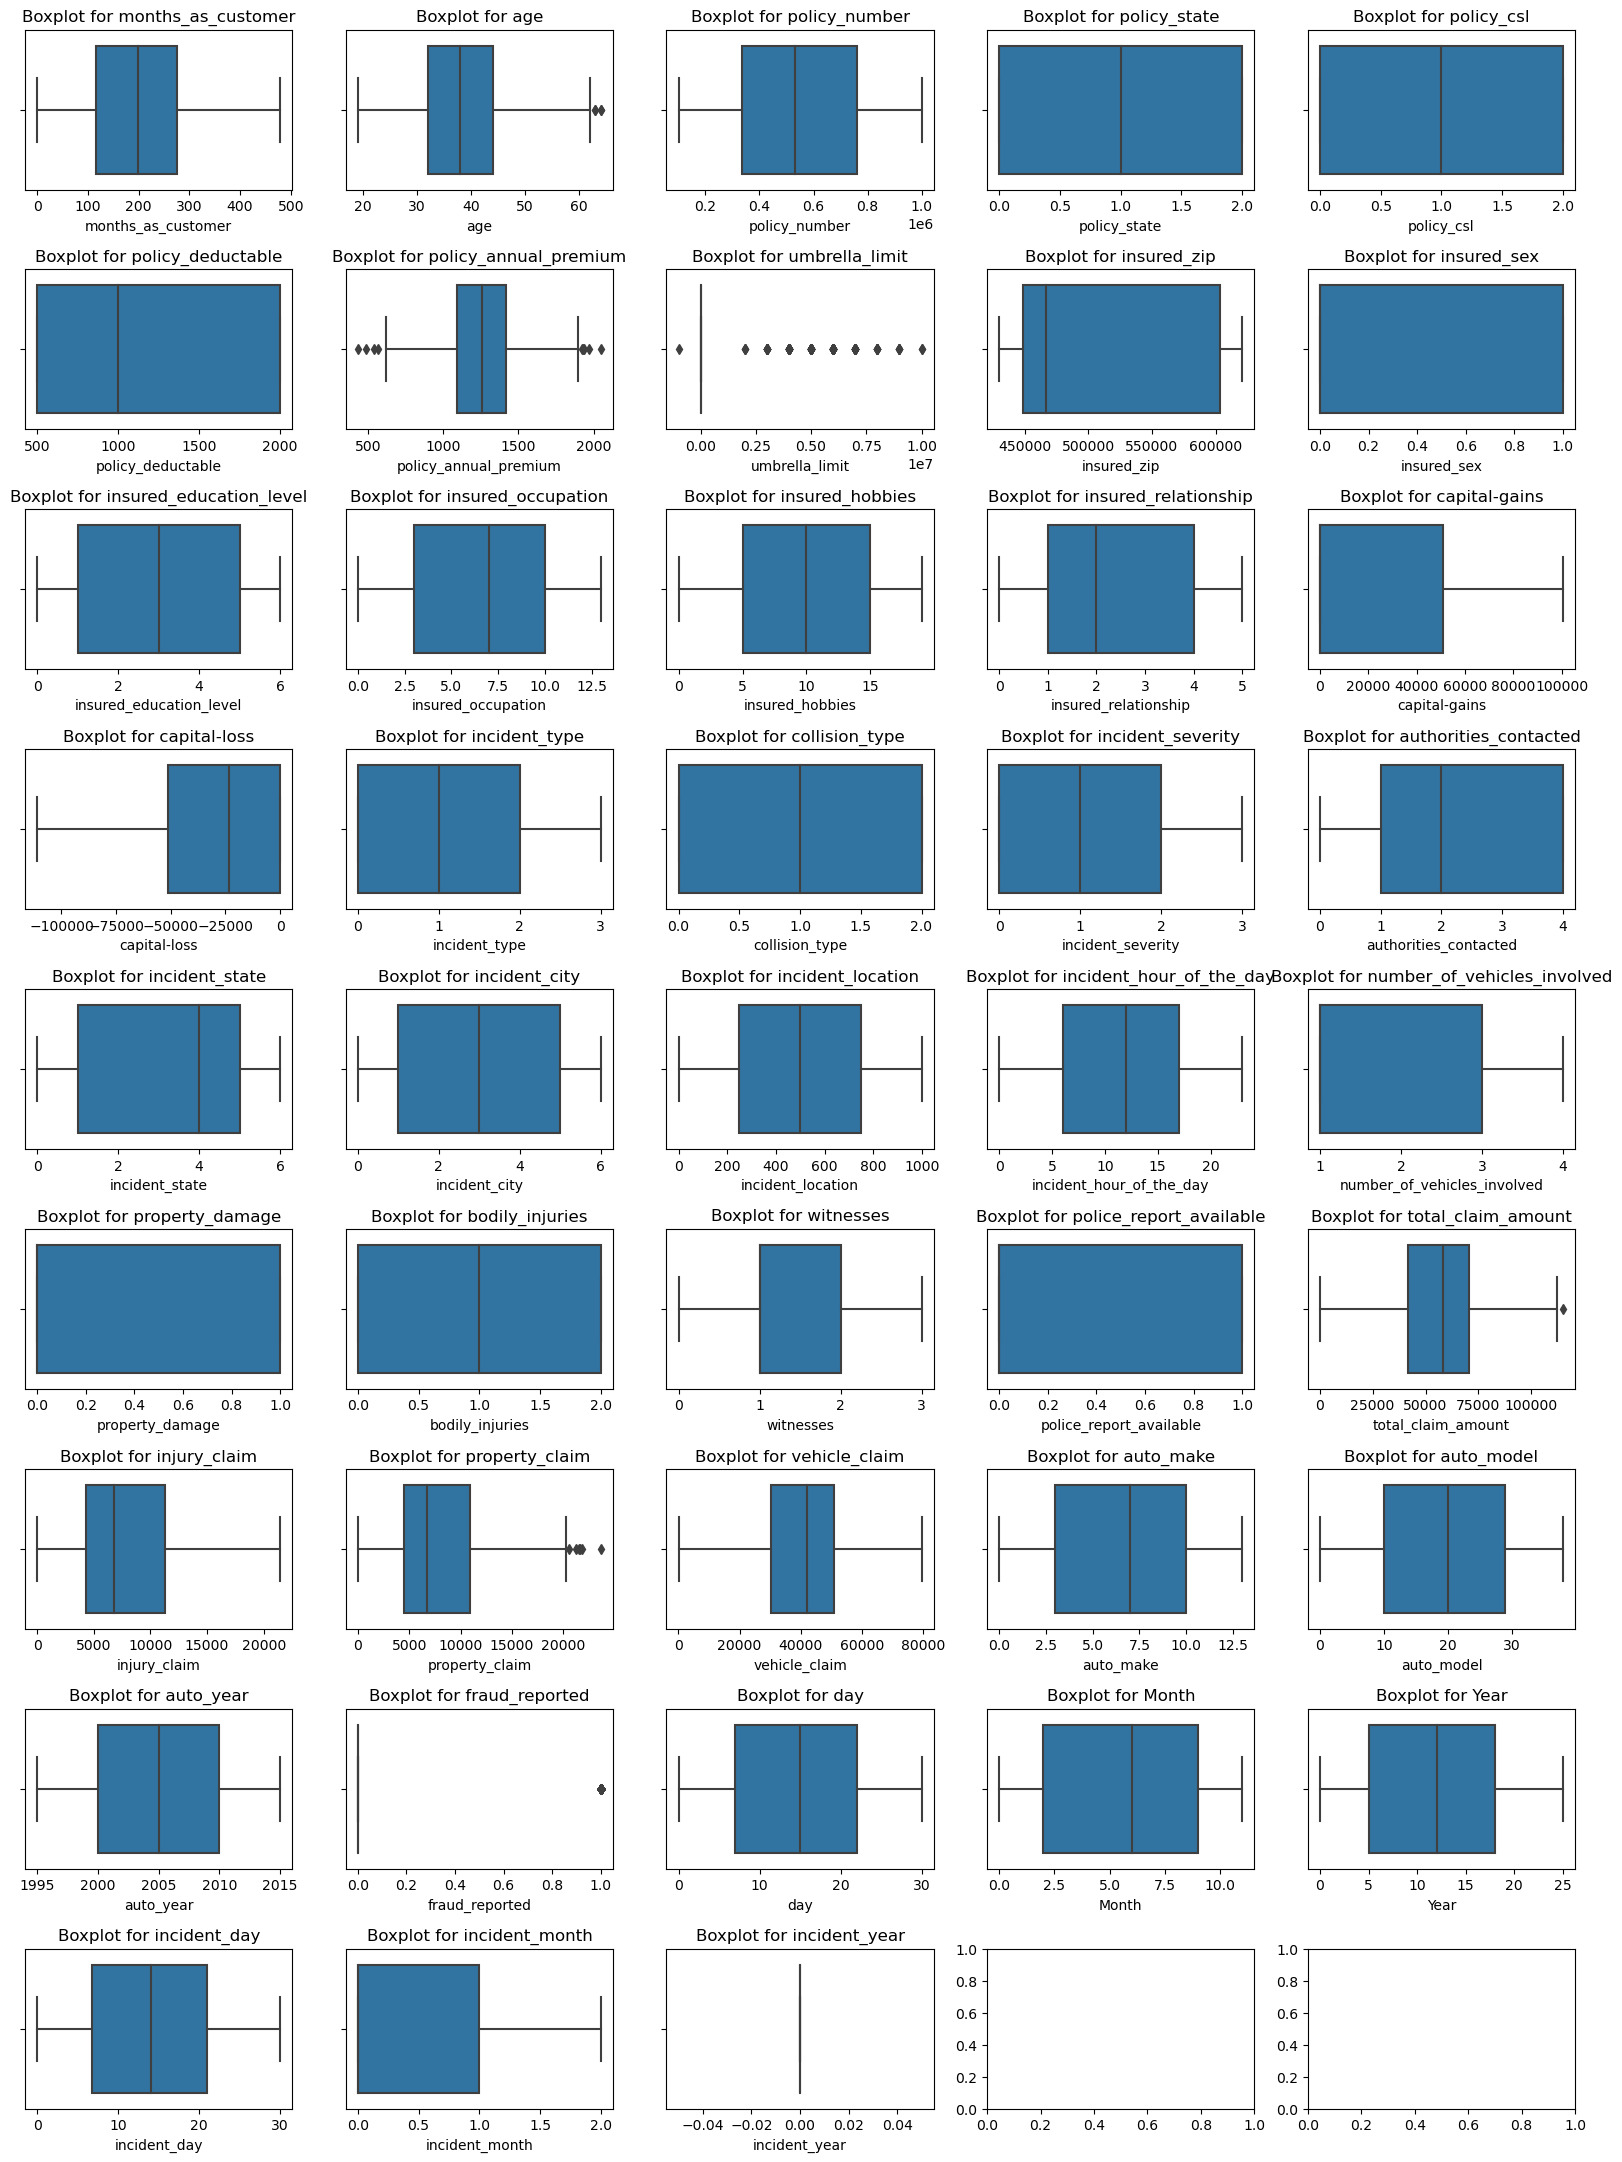

In [61]:
# Selecting only numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# Determine the number of rows and columns for subplots
num_rows = len(numerical_columns.columns) // 5 + (len(numerical_columns.columns) % 5 > 0)
num_cols = min(len(numerical_columns.columns), 5)

# Setting up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 3 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Creating boxplots for each numerical column
for i, column in enumerate(numerical_columns.columns):
    sns.boxplot(x=numerical_columns[column], ax=axes[i // 5, i % 5])
    axes[i // 5, i % 5].set_title(f'Boxplot for {column}')

plt.show()

outlier are present in policy_annual_premium ,umbrella_limit columns ,policy_annual_premium & umbrella_limit columns.

# Handling Oversampling

In [62]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
x_over, y_over = smote.fit_resample(x, y)

# Finding best RandomState:

In [63]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (1,201):
    x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.25,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.6339522546419099  on Random_State  137


# Data Preprocessing:

In [64]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over,y_over, test_size=0.25, random_state=157)

# Model Training:

In [65]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

In [66]:
# Initialize the logistic regression model
logreg_model = LogisticRegression(random_state=137)

# Train the model on the training data
logreg_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.60
Confusion Matrix:
[[111  81]
 [ 69 116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       192
           1       0.59      0.63      0.61       185

    accuracy                           0.60       377
   macro avg       0.60      0.60      0.60       377
weighted avg       0.60      0.60      0.60       377



# 2.SVC

In [67]:
from sklearn.svm import SVC
# Initialize the Support Vector Classifier model
svc_model = SVC(random_state=137)

# Train the model on the training data
svc_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.50
Confusion Matrix:
[[153  39]
 [149  36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.80      0.62       192
           1       0.48      0.19      0.28       185

    accuracy                           0.50       377
   macro avg       0.49      0.50      0.45       377
weighted avg       0.49      0.50      0.45       377



# 3. RandomForestClassifier:

In [68]:
# Initialize the Random Forest classifier model
rf_model = RandomForestClassifier(random_state=137)

# Train the model on the training data
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.87
Confusion Matrix:
[[171  21]
 [ 28 157]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       192
           1       0.88      0.85      0.87       185

    accuracy                           0.87       377
   macro avg       0.87      0.87      0.87       377
weighted avg       0.87      0.87      0.87       377



# 4.DecisionTreeClassifier:

In [69]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=137)

# Train the model on the training data
dt_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.78
Confusion Matrix:
[[151  41]
 [ 41 144]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       192
           1       0.78      0.78      0.78       185

    accuracy                           0.78       377
   macro avg       0.78      0.78      0.78       377
weighted avg       0.78      0.78      0.78       377



# Cross Validation score

In [70]:
# Initialize models
LR = LogisticRegression()
RF = RandomForestClassifier()
DT = DecisionTreeClassifier()
svc = SVC()

# Function to calculate and print cross-validation scores
def calculate_cross_val_scores(model, x, y, cv=5):
    scr = cross_val_score(model, x, y, cv=cv)
    print(f"Cross-validation scores for {model.__class__.__name__}: {scr}")
    print(f"Mean Cross-Validation Score: {scr.mean()}")

# Calculate cross-validation scores for each model
calculate_cross_val_scores(LR, x, y)
calculate_cross_val_scores(RF, x, y)
calculate_cross_val_scores(DT, x, y)
calculate_cross_val_scores(svc, x, y)

Cross-validation scores for LogisticRegression: [0.75  0.75  0.74  0.755 0.755]
Mean Cross-Validation Score: 0.75
Cross-validation scores for RandomForestClassifier: [0.775 0.745 0.73  0.75  0.77 ]
Mean Cross-Validation Score: 0.754
Cross-validation scores for DecisionTreeClassifier: [0.75  0.76  0.775 0.77  0.84 ]
Mean Cross-Validation Score: 0.779
Cross-validation scores for SVC: [0.75  0.75  0.755 0.755 0.755]
Mean Cross-Validation Score: 0.7529999999999999


In [71]:
# we have accuracy and cross-validation scores for each model
acc_lr = 0.60  
cv_score_lr = 0.75  

acc_rf = 0.87  
cv_score_rf = 0.772  

acc_dt = 0.78
cv_score_dt = 0.784  

acc_svc = 0.50  
cv_score_svc = 0.7529999999999999  

# Calculate the differences
lr_diff = acc_lr - cv_score_lr
rf_diff = acc_rf - cv_score_rf
dt_diff = acc_dt - cv_score_dt
svc_diff = acc_svc - cv_score_svc

# Print the differences
print("Logistic Regression Difference:", lr_diff)
print("Random Forest Classifier Difference:", rf_diff)
print("Decision Tree Classifier Difference:", dt_diff)
print("Support Vector Classifier (SVC) Difference:", svc_diff)

Logistic Regression Difference: -0.15000000000000002
Random Forest Classifier Difference: 0.09799999999999998
Decision Tree Classifier Difference: -0.0040000000000000036
Support Vector Classifier (SVC) Difference: -0.2529999999999999


Minimum diffrence in accuracy score and cress validation score is observed in DecisionTree Classifier. so best model is Decision Tree classifier



# Hyper Parameter Tuning

In [72]:
# DecisionTreeClassifier:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

# Performing GridSearchCV
GCV = GridSearchCV(DecisionTreeClassifier(), params, cv=3)
GCV.fit(x_train, y_train)

# Finding the best parameters found by GridSearchCV
best_params = GCV.best_params_

# Creating the Decision Tree model with the best hyperparameters
model = DecisionTreeClassifier(**best_params)
model.fit(x_train, y_train)

# Making predictions on the test set
pred = model.predict(x_test)

# Evaluating the model
print("Accuracy Score:", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))

Accuracy Score: 0.8647214854111406
Confusion Matrix:
 [[163  29]
 [ 22 163]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       192
           1       0.85      0.88      0.86       185

    accuracy                           0.86       377
   macro avg       0.87      0.87      0.86       377
weighted avg       0.87      0.86      0.86       377



# AUC ROC curve

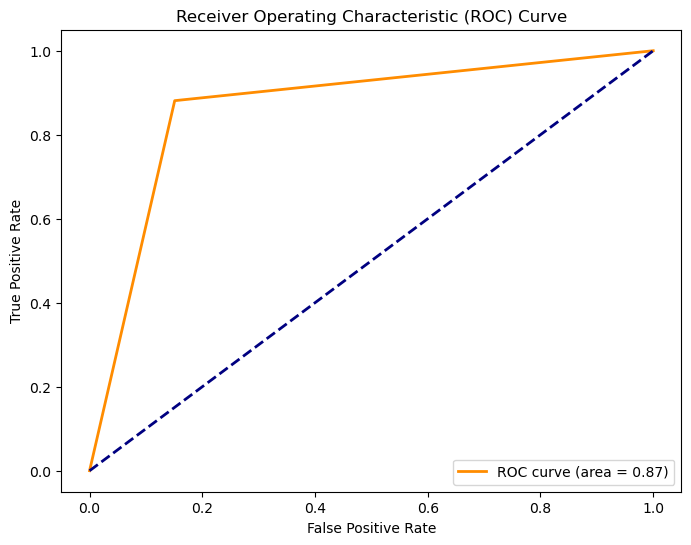

In [73]:
from sklearn.metrics import roc_curve, auc


# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# save the Model

In [74]:
 import pickle

# Save the trained model to a file using pickle
filename = 'insurance_claims_fraud_detection.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully.")

Model saved successfully.


# Conclusion

In [79]:
#conclusion
df_conclusion = pd.DataFrame({"Original": y_test, "Predicted": model.predict(x_test)})

# Displaying the DataFrame
print(df_conclusion)

      Original  Predicted
283          1          1
577          1          1
128          1          1
610          0          0
1484         1          1
...        ...        ...
138          0          0
1            1          0
349          1          1
1405         1          1
122          1          1

[377 rows x 2 columns]
